In [1]:
import os
import glob
from pathlib import Path
import cv2
import numpy as np

In [2]:
 dog_breed_classes = [
 'n02085620-Chihuahua',
 'n02089078-black-and-tan_coonhound',
 'n02091134-whippet',
 'n02108915-French_bulldog',
 ]

class ImageFeatureExtractor:

    def __init__(self, breed_classes):
        self.breed_classes = breed_classes

    # 1. get all images and labels
    def get_image_paths_and_labels(self):
        image_paths = [img_path for breed in self.breed_classes for img_path in glob.glob(f"Images/{breed}/*")]
        image_labels = [index for index, breed in enumerate(self.breed_classes) for _ in glob.glob(f"Images/{breed}/*")]
        return image_paths, image_labels

    # 2. convert edge to histogram
    def edge_to_historgram(self, image_path):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        edges = cv2.Canny(img, 100, 200)    
        hist = np.histogram(edges.ravel(), bins=256, range=[0, 256])[0]
        return hist

extractor = ImageFeatureExtractor(dog_breed_classes)
images, labels = extractor.get_image_paths_and_labels()

# showing first 50 images
for i in range(50):
    print(images[i])

# showing first 50 labels
for i in range(50):
    print(labels[50])

hist = np.array([extractor.edge_to_historgram(image) for image in images])
print(hist)

Images/n02085620-Chihuahua\n02085620_10074.jpg
Images/n02085620-Chihuahua\n02085620_10131.jpg
Images/n02085620-Chihuahua\n02085620_10621.jpg
Images/n02085620-Chihuahua\n02085620_1073.jpg
Images/n02085620-Chihuahua\n02085620_10976.jpg
Images/n02085620-Chihuahua\n02085620_11140.jpg
Images/n02085620-Chihuahua\n02085620_11238.jpg
Images/n02085620-Chihuahua\n02085620_11258.jpg
Images/n02085620-Chihuahua\n02085620_11337.jpg
Images/n02085620-Chihuahua\n02085620_11477.jpg
Images/n02085620-Chihuahua\n02085620_1152.jpg
Images/n02085620-Chihuahua\n02085620_11696.jpg
Images/n02085620-Chihuahua\n02085620_11818.jpg
Images/n02085620-Chihuahua\n02085620_11948.jpg
Images/n02085620-Chihuahua\n02085620_1205.jpg
Images/n02085620-Chihuahua\n02085620_12101.jpg
Images/n02085620-Chihuahua\n02085620_12334.jpg
Images/n02085620-Chihuahua\n02085620_1235.jpg
Images/n02085620-Chihuahua\n02085620_1271.jpg
Images/n02085620-Chihuahua\n02085620_12718.jpg
Images/n02085620-Chihuahua\n02085620_1298.jpg
Images/n02085620-Ch

In [3]:
#3. Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20. (0.25 point) 
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(hist, labels, test_size=0.2, stratify=labels)

In [4]:
#4. Perform standardization on the training dataset. (see https://scikit-learn.org/stable/modules/preprocessing.html (0.25 point)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

mpl = make_pipeline(StandardScaler())
Xtrain_stand = mpl.fit_transform(trainX)
print(Xtrain_stand)

[[-0.86065139  0.          0.         ...  0.          0.
  -0.6960595 ]
 [-1.05336705  0.          0.         ...  0.          0.
  -0.92550582]
 [ 0.01014283  0.          0.         ...  0.          0.
   1.2554376 ]
 ...
 [-0.7893959   0.          0.         ...  0.          0.
  -1.02558773]
 [ 0.20744513  0.          0.         ...  0.          0.
   0.85644703]
 [ 0.2789395   0.          0.         ...  0.          0.
   0.12391693]]


In [5]:
# 5. Perform standardization on the test dataset using the means 
# and variances you obtained from the training dataset.

Xtest_stand = mpl.fit_transform(testX)
print(Xtest_stand)

[[-0.04437043  0.          0.         ...  0.          0.
  -0.19043073]
 [-0.10128718  0.          0.         ...  0.          0.
   0.51552491]
 [-0.03307214  0.          0.         ...  0.          0.
  -0.08543652]
 ...
 [-0.0666081   0.          0.         ...  0.          0.
   0.08538988]
 [-0.09084108  0.          0.         ...  0.          0.
   0.38595884]
 [-0.06021112  0.          0.         ...  0.          0.
   0.0060461 ]]


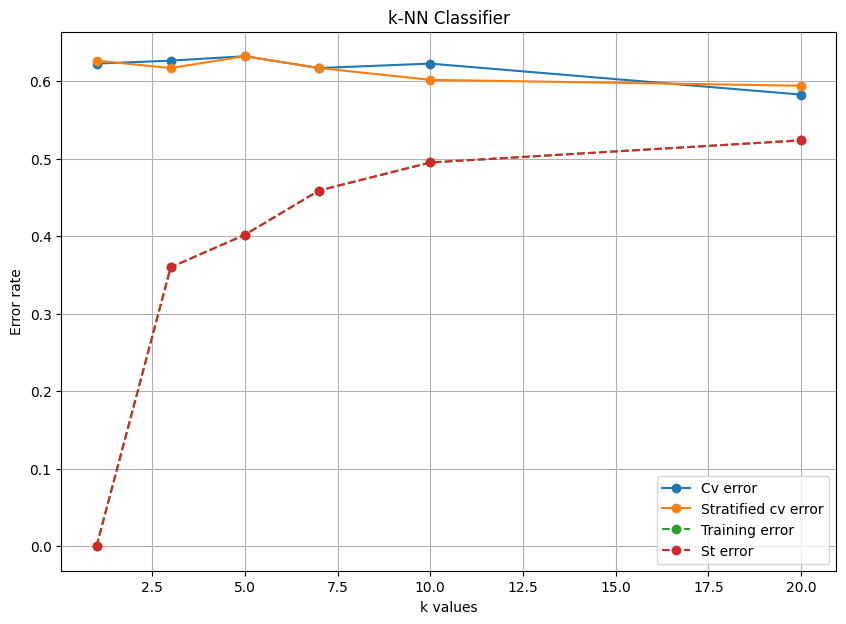

lowest validation error k = 20
Test dataset error rate: 65.90909090909092%


In [8]:
#6. (Model Selection) Perform a standard 5-fold cross-validation and a stratified 5-fold cross-validation
# on the training set (i.e., the standardized edge histogram dataset obtained from the training set) for
# k-Nearest Neighbor Classifiers such that 𝑘 = 1, 3, 5, 7, 10, 20. (2.5 points)

# Plot a graph (x-axis: k; y-axis: mean validation/training error (%)) containing four error curves
# (2 validation error curves and 2 training error curves - label them clearly using a legend to
# define the curves). Which 𝑘 has the lowest mean error for each curve? Comment about (1) the
# model complexity for k-Nearest Neighbor classifier in relation to 𝑘, and (2) when/whether there is
# overfitting/underfitting. (1.5 points)

# Use the 𝑘 value with the lowest mean validation error for your k-Nearest Neighbor classifier from
# the stratified 5-fold cross-validation. What is the error for the test dataset (i.e., the standardized
# edge histogram dataset obtained from the test set)? (0.25 point)

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

class KNN:
    def __init__(self, data, trainX_stand, trainY, trainX, testX_stand, testY):
        self.data = data
        self.trainX_stand = trainX_stand
        self.trainY = trainY
        self.trainX = trainX
        self.testX_stand = testX_stand
        self.testY = testY
        self.error_rates = {"cv_error": [], "stratified_cv_error": []}
        self.training_error = {"training_error": [], "st_error": []}

    def find_errors(self):
        fold = StratifiedKFold(n_splits = 5)

        for val in self.data:
            knn = KNeighborsClassifier(n_neighbors = val)

            CVscores = cross_val_score(knn, self.trainX_stand, self.trainY, cv=5)
            self.error_rates["cv_error"].append(np.mean(1 - CVscores))

            SCVScores = cross_val_score(knn, self.trainX, self.trainY, cv=fold)
            self.error_rates["stratified_cv_error"].append(np.mean(1 - SCVScores))

            knn.fit(trainX, trainY)
            self.training_error["training_error"].append(1 - knn.score(self.trainX, self.trainY))
            self.training_error["st_error"].append(self.training_error["training_error"][-1])
        

    def plot_error_on_graph(self):
        plt.figure(figsize= (10, 7))

        for key, value in self.error_rates.items():
            plt.plot(self.data, value, label=key.replace("_", " ").capitalize(), marker='o')
        for key, value in self.training_error.items():
            plt.plot(self.data, value, label=key.replace("_", " ").capitalize(), linestyle='--', marker='o')

        plt.xlabel('k values')
        plt.ylabel('Error rate')
        plt.title('k-NN Classifier')
        plt.legend()
        plt.grid(True)
        plt.show()

    def find_lowest_validation_error_and_test_error(self):
        kin = np.argmin(self.error_rates["stratified_cv_error"])
        kval = self.data[kin]
        print(f"lowest validation error k = {kval}")

        knn_model = KNeighborsClassifier(n_neighbors=kval)
        knn_model.fit(self.trainX_stand, trainY)

        final_test_error = 1 - knn_model.score(self.testX_stand, testY)
        print(f"Test dataset error rate: {final_test_error * 100}%")

𝑘 = [1, 3, 5, 7, 10, 20]
knn_classifier = KNN(k, Xtrain_stand, trainY, trainX, Xtest_stand, testY)
knn_classifier.find_errors()
knn_classifier.plot_error_on_graph()
knn_classifier.find_lowest_validation_error_and_test_error()

In [9]:
# Which 𝑘 has the lowest mean error for each curve? Comment about (1) the
# model complexity for k-Nearest Neighbor classifier in relation to 𝑘, and (2) when/whether there is overfitting/underfitting. (1.5 points)

# Answer: 
# ----------------------------------------------------
# Lowest mean CV error: at k = 20
# Lowest mean stratified CV error: at k = 20
# Lowest mean training error: at k = 1
# Lowest mean stratified training error: at k = 1

# comment
# ----------------------------------------------------
# + Increase in k value reduces the complexity of the model which makes this method best
# + From graph we can observe that overfitting occurs at low value of k and underfitting 
#   occurs at high value of k


# What is the error for the test dataset (i.e., the standardized
# edge histogram dataset obtained from the test set)? (0.25 point)

# Answer:
# ----------------------------------------------------
# Test error rate: 65.90909090909092%

cross-validation score mean  = 0.45


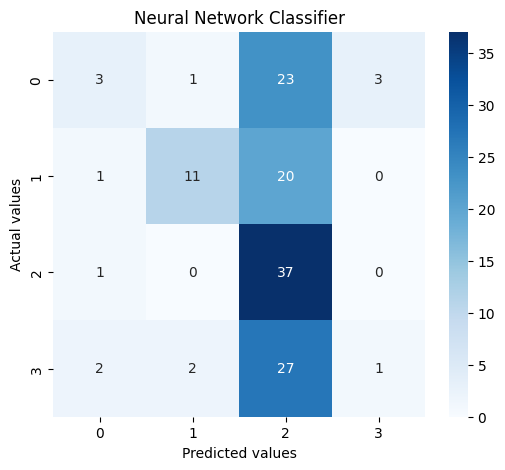

Accuracy score: 0.39
F1 Score: 0.31


In [12]:
# 7. Performance Comparison) Perform stratified 5-fold cross-validation on the 4-class classification problem
# using the three classification methods (available on canvas) assigned to you. 
# Plot the (3) confusion matrices for using three approaches (clearly label the classes 
# on the test set (See Figure 1). (If you use code from any website, please do proper 
# referencing. You will get 0 point for this assignment without proper referencing) 
# (3.75 points)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
import seaborn as sns
import random
import matplotlib.pyplot as plt

class ClassifierEvaluation:
    def __init__(self, classifier, X, y):
        self.classifier = classifier
        self.X = X
        self.y = y
        self.cv_scores = []
        self.start_fold = StratifiedKFold(n_splits=5)

    def cross_validation(self):
        self.cv_scores = cross_val_score(self.classifier, self.X, self.y, cv=self.start_fold)
        print(f"cross-validation score mean  = {np.mean(self.cv_scores):.2f}")
        
    def fit_predict(self, X_train, X_test, y_train):
        self.classifier.fit(X_train, y_train)
        return self.classifier.predict(X_test)

    def plot_confusion_matrix(self, y_true, y_pred, title, color):
        _conf_matrix = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(6,5))
        plot = sns.heatmap(_conf_matrix, annot=True, fmt="d", cmap=color)
        plot.set_title(title)
        plot.set_xlabel("Predicted values")
        plot.set_ylabel("Actual values")
        plt.show()

        _acc = accuracy_score(y_true, y_pred)
        f1__score = f1_score(y_true, y_pred, average="weighted")

        print(f"Accuracy score: {_acc:.2f}")
        print(f"F1 Score: {f1__score:.2f}")


    def evaluate(self, Xtrain_stand, Xtest_stand, ytrain, ytest, title, color):
        self.cross_validation()
        y_pred = self.fit_predict(Xtrain_stand, Xtest_stand, ytrain)
        self.plot_confusion_matrix(ytest, y_pred, title, color)


# Neural Network MLPClassifier
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300, learning_rate_init=0.01)
eval = ClassifierEvaluation(clf, Xtrain_stand, trainY)
eval.evaluate(Xtrain_stand, Xtest_stand, trainY, testY, "Neural Network Classifier", "Blues")

cross-validation score mean  = 0.41


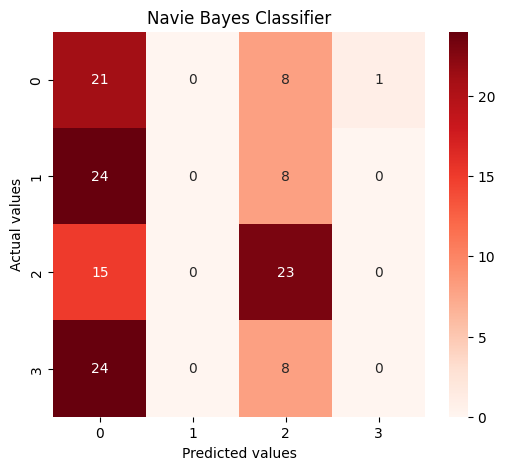

Accuracy score: 0.33
F1 Score: 0.24


In [14]:
# Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

gNB_clf = GaussianNB()
eval = ClassifierEvaluation(gNB_clf, Xtrain_stand, trainY)
eval.evaluate(Xtrain_stand, Xtest_stand, trainY, testY, "Navie Bayes Classifier", "Reds")

cross-validation score mean  = 0.44


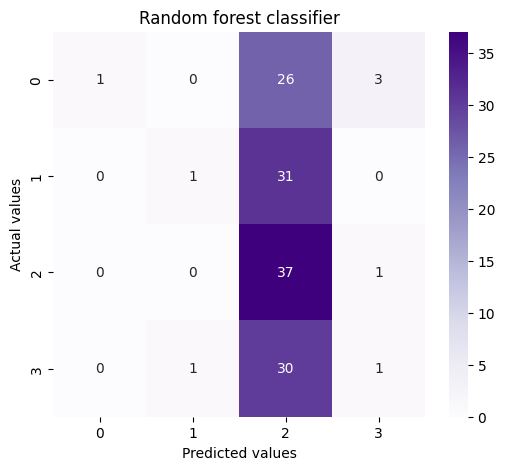

Accuracy score: 0.30
F1 Score: 0.17


In [18]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=2, random_state=1)
eval = ClassifierEvaluation(rf_clf, Xtrain_stand, trainY)
eval.evaluate(Xtrain_stand, Xtest_stand, trainY, testY, "Random forest classifier", "Purples")

In [20]:
# By visually comparing (e.g., looking at the color on the diagonal values, etc.) the 
# three matrices (on the test set), which do you think is the best method? Why? (0.50 point)
# Answer:
    # Neural Network Classifier is the best method becuase its total value of diagonal is more than others.

# ----------------------------------------------->>>>>>>>>>>>>>>

# Based on the mean validation accuracies (from the 5-fold cross-validation) 
# for the three methods. Which is the best method? (0.25 point)
# Answer: 
    # Neural Network Classifier is the best method  because it mean validation accuraries is 0.45 which is 
    #  higher than other two methods

# ----------------------------------------------->>>>>>>>>>>>>>>

# Compute the accuracies for the three methods 
# on the test set. Which is the best method? (0.25 point)
# Answer: 
    # Neural Network classifier has the best Accuracy score: 0.39

# ----------------------------------------------->>>>>>>>>>>>>>>

# Compute the F-measure for the three methods on the test set.
# Which is the best method? (0.25 point)
# Answer: 
    # Neural Network Classifier has the best F1 Score: 0.31

### References:

+ https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
+ https://scikit-learn.org/stable/modules/naive_bayes.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### Confusion matrix
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

#### Standard Scaler
+ https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#### Cross Validation score
+ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

#### Seaborn heatmap
+ https://seaborn.pydata.org/generated/seaborn.heatmap.html